# Metal Furnace Grade Classification

### Import Packages

In [64]:
import os
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

import xgboost as xgb
import lightgbm as lgb
import catboost as cat

# Oversampling
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_columns = 30

### Import Data

In [65]:
def get_data(path):
    train = pd.read_csv(os.path.join(path, "train.csv"))
    test = pd.read_csv(os.path.join(path, "test.csv"))
    
    print("Train Shape : {}\nTest Shape : {}".format(train.shape, test.shape))
    
    return train, test

In [66]:
path = "../data/"

train, test = get_data(path)

target = 'grade'

Train Shape : (620, 29)
Test Shape : (266, 28)


In [67]:
train.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4


In [68]:
test.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,-2.139737,-2.527625,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,0.886135,-0.568935,1.100428,-0.244589,0.229718,-0.217109,0.087039
1,2.078087,-0.273636,-0.496119,0.463262,-2.438092,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,-5.059644,0.06143,0.27735,0.886135,0.504299,-0.434268,-0.244040,0.229718,-0.217109,0.087039


#### Target distribution

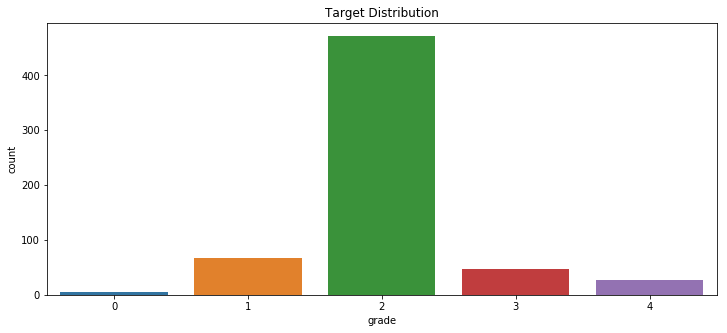

In [99]:
plt.figure(figsize=(12, 5))
sns.countplot(train[target])
plt.title("Target Distribution")
plt.show()

Checking Number of Unique Values

In [70]:
train.nunique()

f0        8
f1       10
f2        7
f3        2
f4        3
f5        8
f6        2
f7        2
f8        3
f9        1
f10       2
f11       2
f12       3
f13       2
f14       2
f15       2
f16       2
f17       2
f18       2
f19       4
f20       2
f21       2
f22      49
f23      63
f24      24
f25       3
f26       3
f27       3
grade     5
dtype: int64

In [71]:
test.nunique()

f0      8
f1      7
f2      6
f3      2
f4      3
f5      6
f6      2
f7      2
f8      3
f9      2
f10     2
f11     2
f12     3
f13     2
f14     2
f15     2
f16     2
f17     2
f18     2
f19     2
f20     2
f21     2
f22    37
f23    41
f24    14
f25     3
f26     3
f27     2
dtype: int64

We can see that most of the features have very less number of unique values, so they might be of categorical nature.

Let's see if they re common in test set.

In [72]:
print("Number of elements which are in test and not in train : ")
for col in train.columns.tolist():
    if col != target:
        print("{} -->\t {}".format(col, len(set(test[col].unique()) - set(train[col].unique()))))
        print("--"*5)

Number of elements which are in test and not in train : 
f0 -->	 8
----------
f1 -->	 7
----------
f2 -->	 6
----------
f3 -->	 2
----------
f4 -->	 3
----------
f5 -->	 6
----------
f6 -->	 2
----------
f7 -->	 2
----------
f8 -->	 3
----------
f9 -->	 2
----------
f10 -->	 2
----------
f11 -->	 2
----------
f12 -->	 3
----------
f13 -->	 2
----------
f14 -->	 2
----------
f15 -->	 2
----------
f16 -->	 2
----------
f17 -->	 2
----------
f18 -->	 2
----------
f19 -->	 2
----------
f20 -->	 2
----------
f21 -->	 2
----------
f22 -->	 37
----------
f23 -->	 41
----------
f24 -->	 14
----------
f25 -->	 3
----------
f26 -->	 3
----------
f27 -->	 2
----------


Seems there is very low common values between train and test.

Let's check the distribution of train and test features.

In [73]:
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
count,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,620.0,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,620.000000
mean,-1.344802e-16,6.596874e-16,3.697759e-17,6.503758e-16,-9.454803e-17,1.146037e-16,1.577591e-16,-2.734820e-16,6.083843e-17,0.0,2.494420e-16,-2.829278e-16,-8.899691e-17,-1.197966e-16,-2.104052e-17,-8.366963e-17,-2.652000e-16,-3.377674e-16,-3.220542e-16,1.148947e-15,1.893647e-16,-1.633102e-16,-9.383175e-17,-4.297638e-18,2.087936e-16,-2.721837e-17,-2.615291e-16,-1.763822e-17,2.033871
std,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,0.0,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,0.630779
min,-8.250977e-01,-2.642501e-01,-4.614228e-01,-2.442599e+00,-2.356907e+00,-2.761441e-01,-2.695676e+00,-1.109054e+01,-1.327888e+01,0.0,-2.526055e+00,-3.237512e+00,-1.999287e+00,-2.118189e+00,-5.783117e+00,-1.011599e+01,-3.237512e+00,-2.487971e+01,-5.477226e+00,-1.316779e+01,-4.286607e+00,-1.080663e+00,-1.079838e+00,-1.899472e+00,-6.876869e-01,-4.914855e+00,-2.324721e-01,-1.572780e+01,0.000000
25%,-8.250977e-01,-2.642501e-01,-4.614228e-01,4.093999e-01,-5.257260e-01,-2.761441e-01,3.709645e-01,9.016696e-02,1.079584e-01,0.0,3.958742e-01,3.088792e-01,5.486225e-01,4.721013e-01,1.729171e-01,9.885336e-02,3.088792e-01,4.019339e-02,1.825742e-01,8.550514e-02,2.332847e-01,-1.080663e+00,-6.838333e-01,-4.063661e-01,-6.876869e-01,2.718856e-01,-2.324721e-01,1.021286e-01,2.000000
50%,-3.794874e-01,-2.642501e-01,-4.614228e-01,4.093999e-01,-5.257260e-01,-2.761441e-01,3.709645e-01,9.016696e-02,1.079584e-01,0.0,3.958742e-01,3.088792e-01,5.486225e-01,4.721013e-01,1.729171e-01,9.885336e-02,3.088792e-01,4.019339e-02,1.825742e-01,8.550514e-02,2.332847e-01,9.253580e-01,-4.593178e-01,-4.061213e-01,-3.659525e-01,2.718856e-01,-2.324721e-01,1.021286e-01,2.000000
75%,5.117331e-01,-2.642501e-01,-4.614228e-01,4.093999e-01,1.305455e+00,-2.761441e-01,3.709645e-01,9.016696e-02,1.079584e-01,0.0,3.958742e-01,3.088792e-01,5.486225e-01,4.721013e-01,1.729171e-01,9.885336e-02,3.088792e-01,4.019339e-02,1.825742e-01,8.550514e-02,2.332847e-01,9.253580e-01,4.432571e-01,1.160673e+00,-2.870961e-01,2.718856e-01,-2.324721e-01,1.021286e-01,2.000000
max,2.294174e+00,4.920404e+00,3.032397e+00,4.093999e-01,1.305455e+00,5.607339e+00,3.709645e-01,9.016696e-02,1.079584e-01,0.0,3.958742e-01,3.088792e-01,5.486225e-01,4.721013e-01,1.729171e-01,9.885336e-02,3.088792e-01,4.019339e-02,1.825742e-01,8.550514e-02,2.332847e-01,9.253580e-01,3.150982e+00,1.833906e+00,1.877777e+00,2.718856e-01,4.519156e+00,1.021286e-01,4.000000


In [74]:
test.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,-3.088590e-17,6.615427e-17,1.014226e-16,-2.433308e-16,-2.721299e-16,5.592853e-17,-2.003410e-17,-1.954368e-16,5.678415e-16,9.208382e-17,1.252131e-17,3.547705e-17,6.678033e-18,-2.712951e-17,-3.958822e-16,1.321520e-16,6.260656e-18,3.592051e-16,5.425902e-17,4.026124e-16,-7.638001e-17,1.719594e-16,-6.678033e-18,3.238846e-16,3.798131e-17,5.246430e-16,2.921640e-18,6.476649e-16
std,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00,1.001885e+00
min,-8.378122e-01,-2.736355e-01,-4.961188e-01,-2.158605e+00,-2.438092e+00,-2.428701e-01,-2.858743e+00,-8.093207e+00,-7.227801e+00,-1.627882e+01,-2.246209e+00,-3.605551e+00,-2.139737e+00,-2.527625e+00,-5.678908e+00,-1.627882e+01,-3.507136e+00,-1.627882e+01,-5.059644e+00,-1.627882e+01,-3.605551e+00,-1.128496e+00,-1.115677e+00,-1.918647e+00,-6.627625e-01,-5.880786e+00,-2.171091e-01,-1.148913e+01
25%,-8.378122e-01,-2.736355e-01,-4.961188e-01,4.632622e-01,-5.851421e-01,-2.428701e-01,3.498040e-01,1.235604e-01,1.667954e-01,6.142951e-02,4.451946e-01,2.773501e-01,5.137365e-01,3.956283e-01,1.760902e-01,6.142951e-02,2.851330e-01,6.142951e-02,1.976424e-01,6.142951e-02,2.773501e-01,-1.128496e+00,-5.689352e-01,-4.345198e-01,-6.627625e-01,2.297182e-01,-2.171091e-01,8.703883e-02
50%,-4.212551e-01,-2.736355e-01,-4.961188e-01,4.632622e-01,-5.851421e-01,-2.428701e-01,3.498040e-01,1.235604e-01,1.667954e-01,6.142951e-02,4.451946e-01,2.773501e-01,5.137365e-01,3.956283e-01,1.760902e-01,6.142951e-02,2.851330e-01,6.142951e-02,1.976424e-01,6.142951e-02,2.773501e-01,8.861348e-01,-4.486282e-01,-4.342682e-01,-3.264657e-01,2.297182e-01,-2.171091e-01,8.703883e-02
75%,4.118591e-01,-2.736355e-01,-4.961188e-01,4.632622e-01,1.267808e+00,-2.428701e-01,3.498040e-01,1.235604e-01,1.667954e-01,6.142951e-02,4.451946e-01,2.773501e-01,5.137365e-01,3.956283e-01,1.760902e-01,6.142951e-02,2.851330e-01,6.142951e-02,1.976424e-01,6.142951e-02,2.773501e-01,8.861348e-01,5.031080e-01,1.100428e+00,-2.440400e-01,2.297182e-01,-2.171091e-01,8.703883e-02
max,2.078087e+00,4.569609e+00,2.852313e+00,4.632622e-01,1.267808e+00,5.568535e+00,3.498040e-01,1.235604e-01,1.667954e-01,6.142951e-02,4.451946e-01,2.773501e-01,5.137365e-01,3.956283e-01,1.760902e-01,6.142951e-02,2.851330e-01,6.142951e-02,1.976424e-01,6.142951e-02,2.773501e-01,8.861348e-01,3.363081e+00,1.867776e+00,2.018820e+00,2.297182e-01,4.663260e+00,8.703883e-02


#### One major thing to check here is that we have same Standard Deviation across all features for train and test.

- Train : 1.000807
- Test : 1.001885

What this implies is that this data might be artificially generated and then normalised/scaled seperatly for train and test. And the values inside th features can be of categorical nature.

But what is not connecting is that we are not able to map train feature values to test feature values as they are different if they indeed are of categorical nature.

Let's deep dive into the distribution of feature values.

In [75]:
# Let's check for feature "f0" : 
# *dividing by number of records to get the percentage.

train['f0'].value_counts() / train.shape[0]

-0.825098    0.487097
 0.511733    0.293548
 2.294174    0.091935
-0.379487    0.059677
 0.066123    0.027419
 1.848564    0.019355
 1.402954    0.012903
 0.957343    0.008065
Name: f0, dtype: float64

In [76]:
test['f0'].value_counts() / test.shape[0]

-0.837812    0.488722
 0.411859    0.263158
 2.078087    0.109023
-0.421255    0.052632
 1.244973    0.030075
 1.661530    0.026316
 0.828416    0.018797
-0.004698    0.011278
Name: f0, dtype: float64

We can see that there is some kind of mapping between train and test values. 

For example : 
    
 - Train has a value : *"-0.825098"* and consists for *48.70% of train values*.

 - Test has a values : *"-0.837812"* and consists for *48.88% of test.values*.

So we map the test values with the corresponding train values, if our hypothesis regarding their categorical nature is True.

Let's check if it is the case with other features too.

In [77]:
def check_value_counts_perc(train, test, col):
    result = pd.concat([(train[col].value_counts() / train.shape[0]).reset_index(), 
                        (test[col].value_counts() / test.shape[0]).reset_index()], 
                       axis=1)
    result.columns = ['train_value', 'train_perc', 'test_value', 'test_perc']
    
    return result

In [78]:
check_value_counts_perc(train, test, "f3")

,train_value,train_perc,test_value,test_perc
0,0.409400,0.856452,0.463262,0.823308
1,-2.442599,0.143548,-2.158605,0.176692


We can see the similar relationship across most of the features except : 

1. f1
1. f2
1. f5
1. f19
1. f22
1. f23
1. f24
1. f27

These features are exception due to the train have more unique values than test uniques, so we can't get a particular one-to-one mapping between Train and Test. 

And feature "f9" has only 1 unique value in train set, so let's remove that feature.

So to map the test values to train values, I've created a function which maps test value to closest train value as seen in the relation tables above.

In [79]:
def get_closest(train, col, value):
    a = train[col].unique().tolist()
    min_idx = min(range(len(a)), key=lambda i: abs(a[i]-value))

    return a[min_idx]

In [80]:
dont_consider_feats = ['f1', 'f2', 'f5', 'f19', 'f22', 'f23', 'f24', 'f27']

for col in train.columns.tolist():
    if col not in dont_consider_feats + [target]:
        test[col] = test[col].apply(lambda x: get_closest(train, col, x))

Sanity Check : Now checking the test values are in train or not.

In [81]:
print("Number of elements which are in test and not in train : ")
for col in train.columns.tolist():
    if col not in dont_consider_feats + [target]:
        print("{} -->\t {}".format(col, len(set(test[col].unique()) - set(train[col].unique()))))
        print("--"*5)

Number of elements which are in test and not in train : 
f0 -->	 0
----------
f3 -->	 0
----------
f4 -->	 0
----------
f6 -->	 0
----------
f7 -->	 0
----------
f8 -->	 0
----------
f9 -->	 0
----------
f10 -->	 0
----------
f11 -->	 0
----------
f12 -->	 0
----------
f13 -->	 0
----------
f14 -->	 0
----------
f15 -->	 0
----------
f16 -->	 0
----------
f17 -->	 0
----------
f18 -->	 0
----------
f20 -->	 0
----------
f21 -->	 0
----------
f25 -->	 0
----------
f26 -->	 0
----------


We can see that the differences are 0 elements so our mapping was sucessfull.

### Another way of doing same can be to use MinMax Scaling seperatly for both train and test as both have different distributions.

**PS : LeaderBoard favored this.** 

In [82]:
# Re-importing the data.

train, test = get_data(path)

Train Shape : (620, 29)
Test Shape : (266, 28)


In [83]:
train.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4


In [84]:
test.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,-2.139737,-2.527625,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,0.886135,-0.568935,1.100428,-0.244589,0.229718,-0.217109,0.087039
1,2.078087,-0.273636,-0.496119,0.463262,-2.438092,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,-5.059644,0.06143,0.27735,0.886135,0.504299,-0.434268,-0.244040,0.229718,-0.217109,0.087039


In [85]:
feat = train.columns.tolist()
feat.remove("f9")
feat.remove(target)

print("Length of features : {}".format(len(feat)))

Length of features : 27


In [86]:
mm = MinMaxScaler()

for col in feat:
    train[col] = mm.fit_transform(train[[col]])
    test[col] = mm.fit_transform(test[[col]])

In [87]:
train.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,0.857143,0.0,0.0,1.0,1.0,0.442857,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.360000,0.400000,0.0,1.0,0.833333,1.0,2
1,0.000000,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.200267,0.399934,0.0,1.0,0.000000,1.0,4


In [88]:
test.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,0.0,0.0,0.529412,1.0,0.5,0.0,1.0,1.0,1.0,0.06143,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.122074,0.797342,0.155943,1.0,0.0,1.0
1,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.06143,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.361702,0.392027,0.156148,1.0,0.0,1.0


### Magic. See how most of the decimal values turned into 0's and 1's both in train and test due to reverse-scaling of the values.

### SMOTE Oversampling : Due to the imbalance of target values in the data.

In [89]:
(train[target].value_counts() / train.shape[0])*100

2    76.129032
1    10.967742
3     7.580645
4     4.354839
0     0.967742
Name: grade, dtype: float64

In [90]:
sm = SMOTE(random_state=13, sampling_strategy='all')
X_train_ovr, y_train_ovr = sm.fit_sample(train[feat], train[target])

print("After Oversampling : {} --> {}".format(X_train_ovr.shape, y_train_ovr.shape))

After Oversampling : (2360, 27) --> (2360,)


In [91]:
train_ovr = pd.DataFrame(X_train_ovr, columns=train.columns.tolist())
train_ovr[target] = y_train_ovr

train_ovr.shape

(2360, 29)

In [92]:
(train_ovr[target].value_counts() / train_ovr.shape[0])*100

3    20.0
1    20.0
4    20.0
2    20.0
0    20.0
Name: grade, dtype: float64

#### We have totally balanced classes right now. But we have to understand that we also have to make the model understand the imbalance of classes because the test set also might have the same kind of imbalances.

I've kept this section here because applying SMOTE increases your score on the public leaderboard way up.

You can comment this section to get the private best submission.

### Baselining

In [93]:
def baseliner(X, y, cv=3, metric='neg_log_loss'):
    print("Baseliner Models\n")
    eval_dict = {}
    models = [lgb.LGBMClassifier(), xgb.XGBClassifier(), GradientBoostingClassifier(),
                  LogisticRegression(), GaussianNB(), RandomForestClassifier(), DecisionTreeClassifier(),
                  ExtraTreeClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(),
              SVC(probability=True), KNeighborsClassifier() 
                 ]
    print("Model Name \t |   CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, X, y, cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = results.mean()

        print("%s \t | %.4f \t" % (
            model_name[:12], eval_dict[model_name]['cv']))

In [94]:
baseliner(train[feat], train[target])

Baseliner Models

Model Name 	 |   CV
----------------------------------------------------------------------------------------------------
LGBMClassifi 	 | -0.2522 	
XGBClassifie 	 | -0.1753 	
GradientBoos 	 | -0.2195 	
LogisticRegr 	 | -0.4035 	
GaussianNB 	 | -15.2884 	
RandomForest 	 | -0.2709 	
DecisionTree 	 | -2.6181 	
ExtraTreeCla 	 | -4.0691 	
AdaBoostClas 	 | -1.2696 	
BaggingClass 	 | -0.4569 	
ExtraTreesCl 	 | -0.4819 	
SVC 	 | -0.3605 	
KNeighborsCl 	 | -0.9636 	


#### We can see that gradient boosting works better for now i.e LightGBM & XGBoost.

### Utilities for Modelling

In [95]:
def splitter(X, y, ts=False):
    if ts:
        trainX, validX, trainY, validY = train_test_split(X,
                                                          y, test_size=0.15,
                                                          random_state=13, shuffle=False)
    else:
        trainX, validX, trainY, validY = train_test_split(X,
                                                      y, test_size=0.15,
                                                      random_state=13)
    return trainX, validX, trainY, validY

def xgb_model(X, X_test, y, ts=False):

    MAX_ROUNDS=2000
    early_stopping_rounds=100
    params = {
        'booster': 'gbtree',
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'learning_rate': 0.06,
        'num_round': MAX_ROUNDS,
        'max_depth': 8,
        'seed': 13,
        'nthread': -1,
        "num_class": 5,
    }
    
    X_train, X_valid, y_train, y_valid = splitter(X, y, ts=ts)
    print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

    model = xgb.train(
        params,
        dtrain,
        evals=watchlist,
        num_boost_round=MAX_ROUNDS,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=50
    )
    print("Best Iteration :: ", model.best_iteration)

    # Plotting Importances
    fig, ax = plt.subplots(figsize=(24, 24))
    xgb.plot_importance(model, height=0.4, ax=ax)
    preds = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)

    return model, preds

### Modelling

(527, 27) (93, 27) (527,) (93,)
[0]	train-mlogloss:1.48457	valid-mlogloss:1.49537
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:0.144644	valid-mlogloss:0.287787
[100]	train-mlogloss:0.054622	valid-mlogloss:0.234181
[150]	train-mlogloss:0.036065	valid-mlogloss:0.226338
[200]	train-mlogloss:0.029773	valid-mlogloss:0.224078
[250]	train-mlogloss:0.026577	valid-mlogloss:0.228595
Stopping. Best iteration:
[180]	train-mlogloss:0.03176	valid-mlogloss:0.222235

Best Iteration ::  180


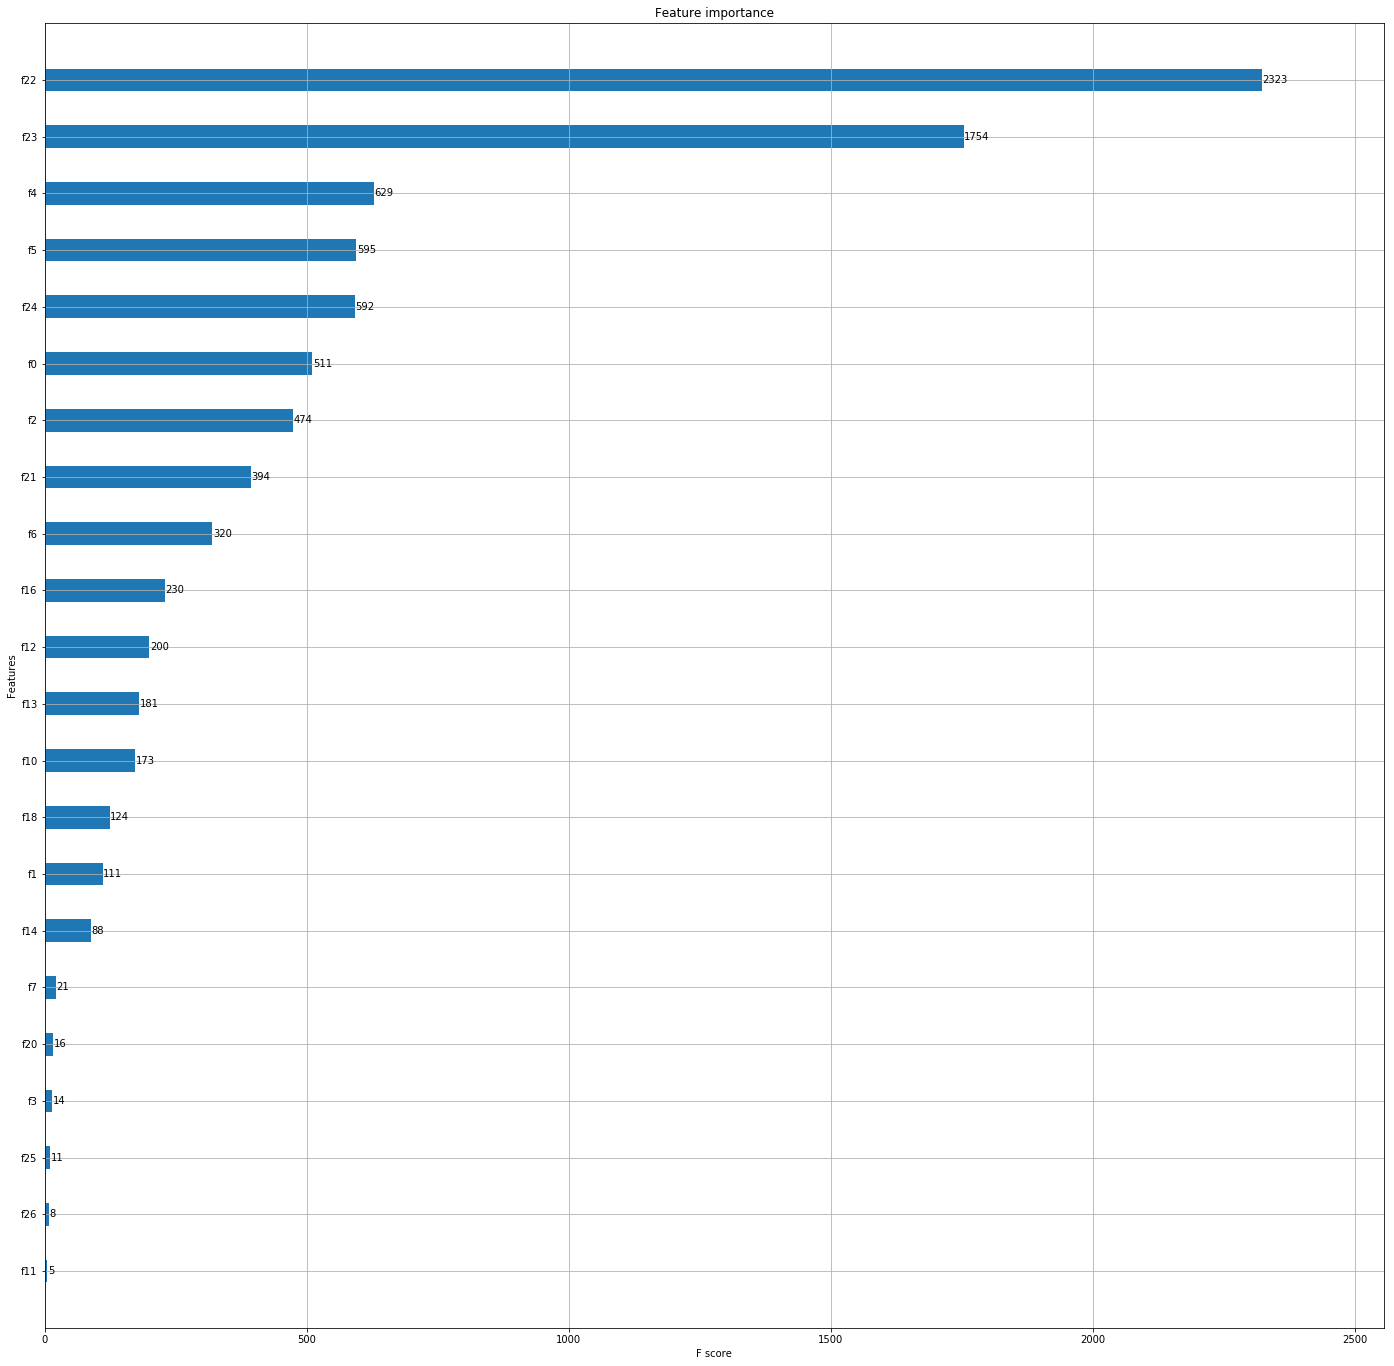

In [96]:
xgbM, xgb_preds = xgb_model(train[feat], test[feat], train[target])

#### Now fitting on full data (as it is we have less data with very imbalanced classes)

[0]	train-mlogloss:1.48475
Will train until train-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:0.143565
[100]	train-mlogloss:0.053436
[150]	train-mlogloss:0.033532
[200]	train-mlogloss:0.027077
[249]	train-mlogloss:0.023775
Best Iteration ::  249


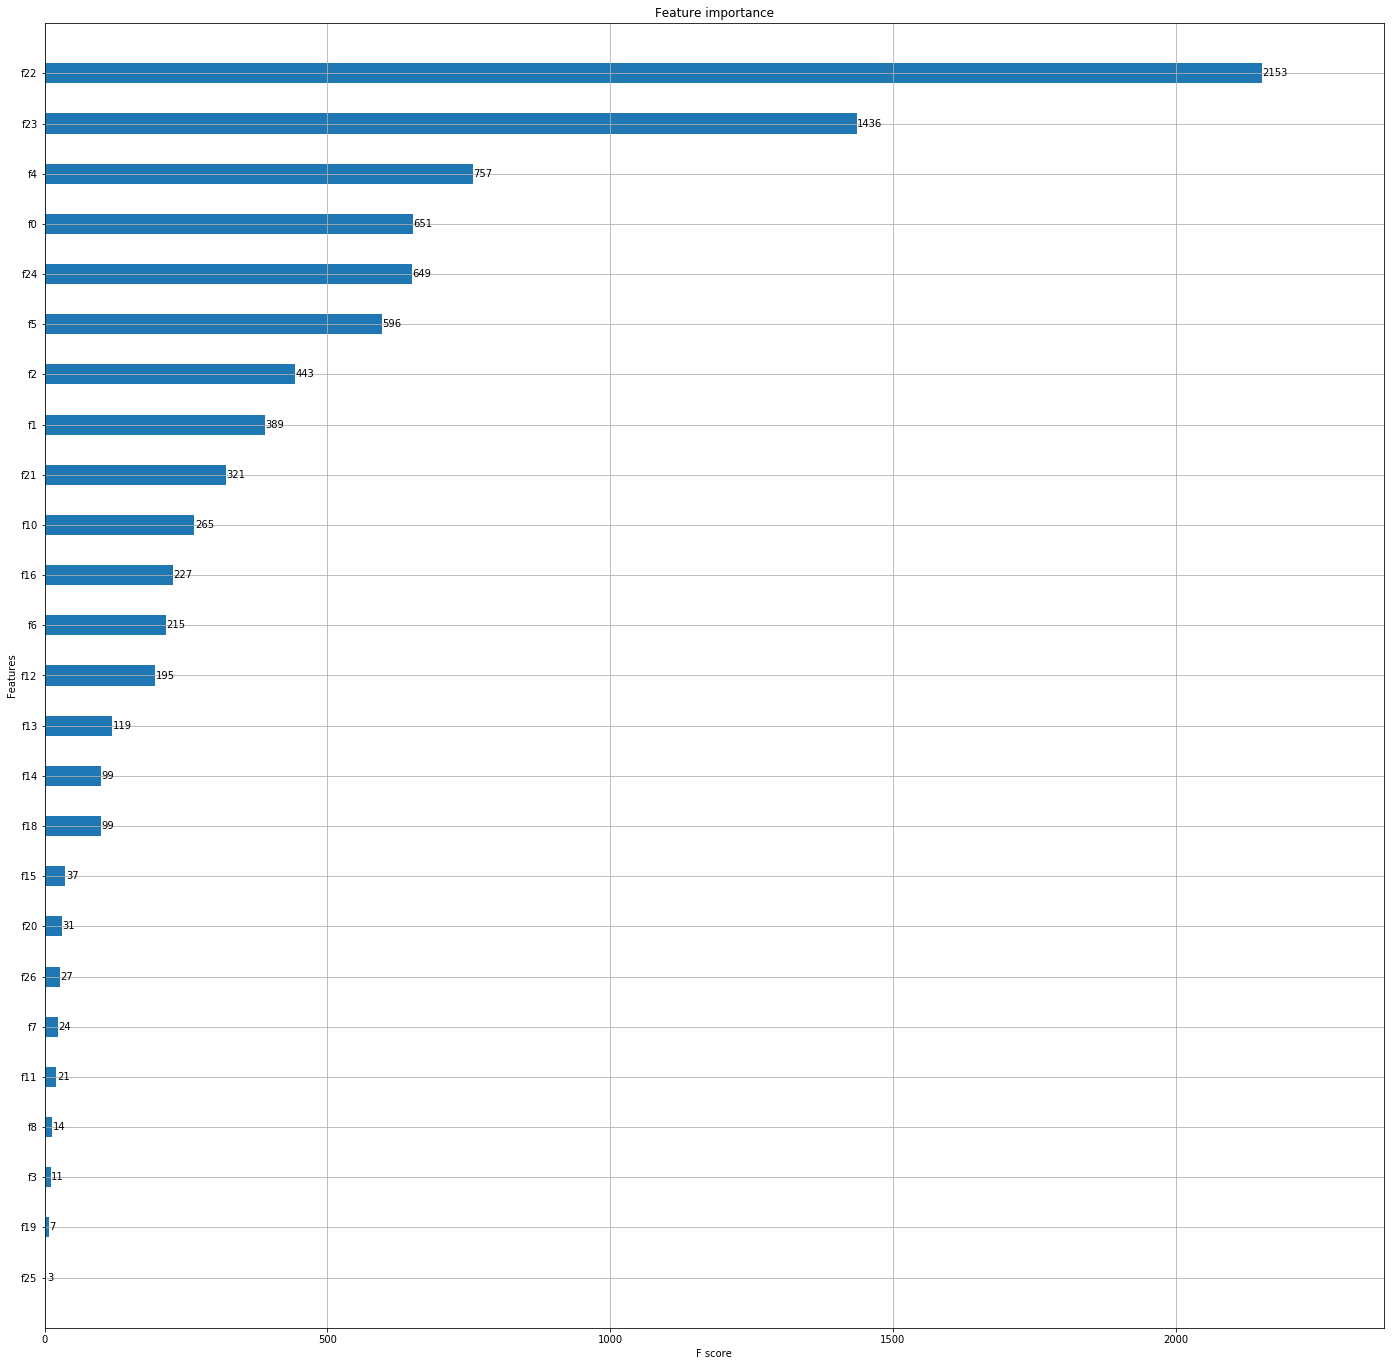

In [97]:
MAX_ROUNDS=250 # Just neat the rounds it stopped i.e 180
early_stopping_rounds=100
params = {
    'booster': 'gbtree',
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'learning_rate': 0.06,
    'num_round': MAX_ROUNDS,
    'max_depth': 8,
    'seed': 13,
    'nthread': -1,
    "num_class": 5,
}

dtrain = xgb.DMatrix(train[feat], label=train[target])
watchlist = [(dtrain, 'train')]

model = xgb.train(
    params,
    dtrain,
    evals=watchlist,
    num_boost_round=MAX_ROUNDS,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=50
)
print("Best Iteration :: ", model.best_iteration)

# Plotting Importances
fig, ax = plt.subplots(figsize=(24, 24))
xgb.plot_importance(model, height=0.4, ax=ax)
xgb_preds = model.predict(xgb.DMatrix(test[feat]), ntree_limit=model.best_ntree_limit)

### Submission

In [98]:
sub = pd.DataFrame(xgb_preds)
sub.to_excel("../subs/best_private.xlsx", index=False)

sub.head(2)

,0,1,2,3,4
0,0.000086,0.000226,0.999484,0.000091,0.000113
1,0.000186,0.014087,0.003089,0.982405,0.000233


# END